# 4.2.4 파이썬 K-평균 군집(K-means Clustering)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch4/stroke-scaled.csv')
df.shape

(4909, 3)

In [ ]:
df.head(3)

,age,avg_glucose_level,bmi
0,1.070138,2.777698,0.981345
1,1.646563,0.013842,0.459269
2,0.272012,1.484132,0.701207


In [ ]:
# 참조 코딩
df

,age,avg_glucose_level,bmi
0,1.070138,2.777698,0.981345
1,1.646563,0.013842,0.459269
2,0.272012,1.484132,0.701207
3,1.602222,1.549193,-0.623083
4,1.690903,1.821368,0.013595
...,...,...,...
4904,-1.324241,-0.050094,-1.310695
4905,1.690903,0.447882,1.414286
4906,-0.348753,-0.502369,0.217332
4907,0.360692,1.372920,-0.419346


In [ ]:
from sklearn.cluster import KMeans        # 사이킷런 라이브러리에서 KMeans를 불러오기
km = KMeans(n_clusters=3, random_state=0) # Kmeans 기능에서 군집 개수를 3개로 설정
df['cluster'] = km.fit_predict(df)        # 데이터프레임 df를 군집분석한 결과로서 군집 결과값(레이블)을
df                                        # cluster라는 변수명에 저장

,age,avg_glucose_level,bmi,cluster
0,1.070138,2.777698,0.981345,1
1,1.646563,0.013842,0.459269,0
2,0.272012,1.484132,0.701207,1
3,1.602222,1.549193,-0.623083,1
4,1.690903,1.821368,0.013595,1
...,...,...,...,...
4904,-1.324241,-0.050094,-1.310695,2
4905,1.690903,0.447882,1.414286,0
4906,-0.348753,-0.502369,0.217332,0
4907,0.360692,1.372920,-0.419346,1


In [ ]:
km.cluster_centers_

array([[ 0.49163911, -0.36676422,  0.36229297],
       [ 0.78171714,  2.23498965,  0.57702459],
       [-1.07091421, -0.28226236, -0.78953804]])

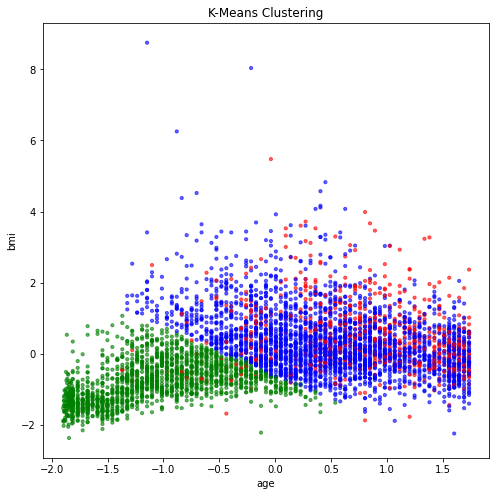

In [ ]:
# 클러스터 레이블 별 colors를 다음과 같이 저장 
# cluster0: 파랑, cluster1: 빨강, cluster2: 녹색 
colors = ['b', 'r', 'g']
df['c'] = df['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]})

import matplotlib.pyplot as plt # matplotlib 라이브러리를 호출

# 그래프 그리기
fig, ax = plt.subplots(1, figsize=(8,8))
scatter = ax.scatter(df['age'],df['bmi'],c=df['c'], alpha = 0.6, s=10)

# 제목과 x축 y축 이름 설정 
ax.set_title('K-Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('bmi');

### 아래 결과를 보면 빨강과 파랑 클러스터를 명확하게 구분할 수 없음에 유의
# 파랑 cluster0: 나이가 아주 어리지는 않은 그룹  
# 빨강 cluster1: 나이가 아주 어리지는 않은 그룹
# 녹색 cluster2: 나이가 어리고 체질량이 작은 그룹

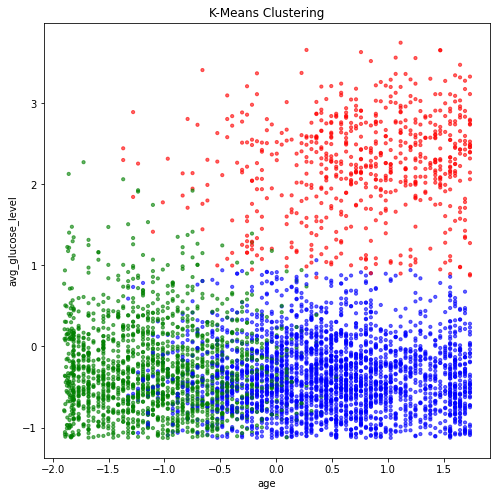

In [ ]:
# 그래프 그리기
fig, ax = plt.subplots(1, figsize=(8,8))
scatter = ax.scatter(df['age'],df['avg_glucose_level'],c=df['c'], alpha = 0.6, s=10)

# 제목과 x축 y축 이름 설정 
ax.set_title('K-Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('avg_glucose_level');

### 아래 결과를 보면 나이 및 혈당치로 클러스터를 명확하게 구분할 수 있
# 파랑 cluster0: 혈당량이 낮은 성인  
# 빨강 cluster1: 혈당량이 높은 성인
# 녹색 cluster2: 어린이 및 청소년

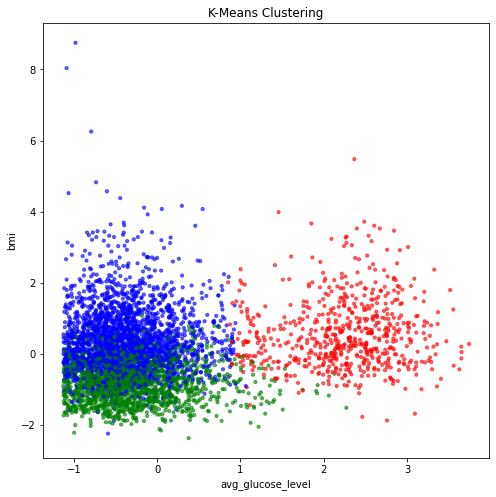

In [ ]:
# 그래프 그리기
fig, ax = plt.subplots(1, figsize=(8,8))
scatter = ax.scatter(df['avg_glucose_level'], df['bmi'],c=df['c'], alpha = 0.6, s=10)

# 제목과 x축 y축 이름 설정 
ax.set_title('K-Means Clustering')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi');

### 아래 결과를 보면 클러스터를 명확하게 구분할 수 있음
# 파랑 cluster0: 혈당량이 낮고 체질량은 높은 그룹  
# 빨강 cluster1: 혈당량이 높은 그룹
# 녹색 cluster2: 혈당량과 체질량이 모두 낮은 그룹

In [ ]:
# 참조 코딩
df_c0 = df[df['cluster'] == 0]   # cluster 값(레이블) 0인 행들만 df_c0 데이터프레임에 저장합니다.
df_c1 = df[df['cluster'] == 1]   # cluster 값(레이블) 1인 행들만 df_c1 데이터프레임에 저장합니다.
df_c2 = df[df['cluster'] == 2]   # cluster 값(레이블) 2인 행들만 df_c2 데이터프레임에 저장합니다.

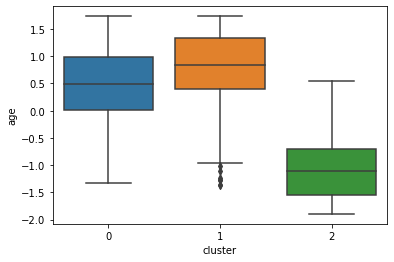

In [ ]:
import seaborn as sns                # seaborn 라이브러리 불러오기
sns.boxplot(x=df['cluster'], y=df['age']); # cluster별로 나이(age)의 상자그림 그리기

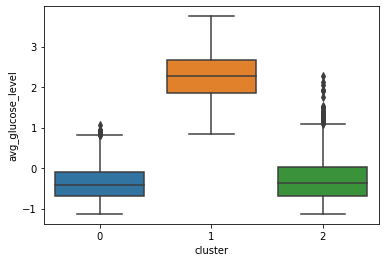

In [ ]:
sns.boxplot(x=df['cluster'], y=df['avg_glucose_level']); # cluster별로 평균 혈당량의 상자그림 그리기

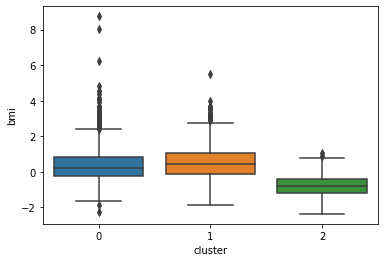

In [ ]:
sns.boxplot(x=df['cluster'], y=df['bmi']);   # cluster별로 체질량 지수(bmi)의 상자그림 그리기